## Removal of exceptions according to the Tukey method (IQR1.5)

In [2]:
import pandas as pd

# Load the CSV file
df = pd.read_csv('./0507_cleaned_booking_hotels.csv')

# Ensure the price column is treated as a float
# Assuming 'price_per_night' is already numerical
df['price_per_night'] = df['price_per_night'].astype(float)

# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = df['price_per_night'].quantile(0.25)
Q3 = df['price_per_night'].quantile(0.75)

# Calculate the IQR (Interquartile Range)
IQR = Q3 - Q1

# Determine the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers
df_no_outliers = df[(df['price_per_night'] >= lower_bound) & (df['price_per_night'] <= upper_bound)]

print(f"Original DataFrame shape: {df.shape}")
print(f"DataFrame shape after removing outliers: {df_no_outliers.shape}")

df_no_outliers.to_csv('./0507_cleaned_booking_hotels.csv', index=False)

df_no_outliers.T

Original DataFrame shape: (26249, 21)
DataFrame shape after removing outliers: (25571, 21)


,0,1,2,3,4,5,6,7,8,9,...,26239,26240,26241,26242,26243,26244,26245,26246,26247,26248
name,U.S. Pacific Hotel,West Side YMCA,Hudson Yard 408,The Gatsby Hotel,Orchard Street Hotel,Chelsea Rooms NYC,"Hotel Shocard Broadway, Times Square",The Frederick Hotel Tribeca,Courtyard New York Downtown Manhattan/Financia...,Doxie Hotel,...,Studio Haven in Times Square & Nearby Restaurants,Freehand New York,Hyatt Centric Wall Street New York,Hampton Inn Manhattan-35th St Empire State Bldg,Courtyard by Marriott New York Manhattan/Chelsea,Lux room with shared bath Apt,Lux bright room with shared bath Apt,Lux prvt bath shared Apt,Millennium Premier New York Times Square,Arthouse Hotel
score,5.6,6.6,4.4,6.3,6.7,7.5,7.3,8.0,7.5,6.8,...,6.1,7.8,8.2,8.2,8.3,NaN,NaN,NaN,7.2,7.9
reviews,2473.0,13729.0,61.0,689.0,642.0,703.0,2434.0,2271.0,1711.0,622.0,...,8.0,1920.0,607.0,6491.0,1512.0,NaN,NaN,NaN,1323.0,1916.0
room_type,Standard Double (No Window),Bunk Bed Room with Shared Bathroom,Double Room,Gatsby Full,Orchard Full,Deluxe Double Room,Queen Room,Standard 1 Full Bed,"Guest room, 1 King, City view",Queen Room,...,Apartment,King Room,King Room,King Room - Non-Smoking,King Room,Double Room,Double Room with Shared Bathroom,Double Room with Private Bathroom,Premier Queen Room,Superior Queen
bed_type,New YorkShow on map5.7 km from centreMetro ac...,New YorkShow on map350 m from centreMetro access,New YorkShow on map1.9 km from centreMetro ac...,New YorkShow on map5 km from centreMetro access,New YorkShow on map5.3 km from centreMetro ac...,New YorkShow on map2.5 km from centreMetro ac...,New YorkShow on map1.5 km from centreMetro ac...,New YorkShow on map6.3 km from centreMetro ac...,New YorkShow on map7.1 km from centreMetro ac...,New YorkShow on map1.7 km from centreMetro ac...,...,New YorkShow on map1.1 km from centreMetro ac...,New YorkShow on map3.1 km from centreMetro ac...,New YorkShow on map7.3 km from centreMetro ac...,New YorkShow on map2 km from centreMetro access,New YorkShow on map2.4 km from centreMetro ac...,New YorkShow on map7.6 km from centreMetro ac...,New YorkShow on map7.6 km from centreMetro ac...,New YorkShow on map7.6 km from centreMetro ac...,New YorkShow on map1.2 km from centreMetro ac...,New YorkShow on map1.6 km from centreMetro ac...
price,140.0,182.0,189.0,215.0,215.0,235.0,239.0,240.0,243.0,243.0,...,1411.0,1413.0,1414.0,1417.0,1417.0,1418.0,1418.0,1418.0,1421.0,1422.0
availability,"1 night, 2 adults","1 night, 2 adults","1 night, 2 adults","1 night, 2 adults","1 night, 2 adults","1 night, 2 adults","1 night, 2 adults","1 night, 2 adults","1 night, 2 adults","1 night, 2 adults",...,"5 nights, 2 adults","5 nights, 2 adults","5 nights, 2 adults","5 nights, 2 adults","5 nights, 2 adults","5 nights, 2 adults","5 nights, 2 adults","5 nights, 2 adults","5 nights, 2 adults","5 nights, 2 adults"
los,1,1,1,1,1,1,1,1,1,1,...,5,5,5,5,5,5,5,5,5,5
url,https://www.booking.com/hotel/us/us-pacific.en...,https://www.booking.com/hotel/us/west-side-ymc...,https://www.booking.com/hotel/us/hudson-new-yo...,https://www.booking.com/hotel/us/gatsby.en-gb....,https://www.booking.com/hotel/us/orchard-stree...,https://www.booking.com/hotel/us/chelsea-rooms...,https://www.booking.com/hotel/us/41-at-times-s...,https://www.booking.com/hotel/us/new-york-95-w...,https://www.booking.com/hotel/us/courtyard-new...,https://www.booking.com/hotel/us/manhattan-bro...,...,https://www.booking.com/hotel/us/studio-haven-...,https://www.booking.com/hotel/us/freehand-new-...,https://www.booking.com/hotel/us/andaz-wall-st...,https://www.booking.com/hotel/us/hampton-inn-m...,https://www.booking.com/hotel/us/courtyard-by-...,https://www.booking.com/hotel/us/lux-room-with...,https://www.booking.com/hotel/us/lux-bright-ro...,https://www.booking.com/hotel/us/lux-prvt-bath...,https://www.booking.com/hotel/us/the-premier-n...,https://www.booking.com/hotel/us/arthouse-hote...
star_rating,1.0,3.0,NaN,3.0,3.0,2.0,3.0,5.0,3.0,2.0,...,3.0,4.0,4.0,3.0,4.0,NaN,NaN,4.0,4.0,4.0


# Feature engineering  

##  room level rating

In [8]:
import pandas as pd


# Display the unique room types to identify keywords
df = pd.read_csv('./0507_cleaned_booking_hotels.csv')
unique_room_types = df['room_type'].unique()

# Create a list of keywords for room rate categorization
keywords = [
    ('standard', 1), ('single', 1), ('twin', 1), ('double', 1),
    ('deluxe', 2), ('superior', 2), ('queen', 2), ('economy', 2),
    ('executive', 3), ('king', 3), ('studio', 3), ('family', 3),
    ('suite', 4), ('junior suite', 4), ('mini-suite', 4), ('junior', 4),
    ('master suite', 5), ('presidential', 5), ('penthouse', 5), ('villa', 5),
    ('luxury', 5), ('aparthotel', 4), ('apart-style', 4),
    ('connecting', 3), ('adjoining', 3), ('adjacent', 3), ('accessible', 3),
    ('resort', 5), ('boutique', 5), ('lodge', 2)
]

# Assign room rates based on keywords
def assign_room_rate(room_type):
    room_type_lower = str(room_type).lower()  # Convert to lowercase
    max_rate = 0  # Default rate
    for keyword, rate in keywords:
        if keyword in room_type_lower:
            max_rate = max(max_rate, rate)
    return max_rate

df['room_rate'] = df['room_type'].apply(assign_room_rate)
df.to_csv('./0507_cleaned_booking_hotels.csv', index=False)


 ## categorize_neighborhood

In [9]:
df_unique_hotels = df.drop_duplicates(subset='name')
# Count the number of unique neighborhoods
num_neighborhoods = df_unique_hotels['neighborhood'].nunique()
# Print the result
print(f'There are {num_neighborhoods} unique neighborhoods in the data.')


# Count the number of hotels in each neighborhood
hotels_per_neighborhood = df.groupby('neighborhood').size().reset_index(name='hotel_count')

# Print the result
print(hotels_per_neighborhood)


There are 24 unique neighborhoods in the data.
                                         neighborhood  hotel_count
0                                             Chelsea         2707
1                                           Chinatown          885
2                                         East Harlem          281
3                                        East Village           54
4                                   Flatiron District          298
5                                            Gramercy          143
6                                   Greenwich Village          177
7                                              Harlem          926
8                                      Hell's Kitchen         3834
9                                        Hudson Yards          326
10                                           Kips Bay          136
11                                       Little Italy          123
12                                    Lower East Side         1542
13             

In [10]:
import pandas as pd

# Load the CSV file
df = pd.read_csv('./0507_cleaned_booking_hotels.csv')

# Clean neighborhood column
df['neighborhood'] = df['neighborhood'].str.replace(r'New YorkShow on map.*', 'Other Manhattan', regex=True)

# Function to categorize neighborhoods
def categorize_neighborhood(neighborhood):
    downtown = ['Chinatown', 'East Village', 'Flatiron District', 'Greenwich Village', 'Lower East Side', 'NoMad', 'SoHo', 'Tribeca', 'Union Square', 'Little Italy']
    midtown = ['Chelsea', 'Gramercy', "Hell's Kitchen", 'Hudson Yards', 'Kips Bay', 'Midtown East', 'Murray Hill']
    uptown = ['East Harlem', 'Harlem', 'Upper East Side', 'Upper West Side', 'Washington Heights']
    
    if neighborhood in downtown:
        return 'Downtown Manhattan'
    elif neighborhood in midtown:
        return 'Midtown Manhattan'
    elif neighborhood in uptown:
        return 'Uptown Manhattan'
    elif neighborhood == 'Governors Island':
        return 'Governors Island'
    elif neighborhood == 'Brooklyn':
        return 'Brooklyn'
    elif neighborhood == 'Queens':
        return 'Queens'
    elif neighborhood == 'Bronx':
        return 'Bronx'
    elif neighborhood == 'Staten Island':
        return 'Staten Island'
    elif neighborhood == 'Manhattan':
        return 'Other Manhattan'
    else:
        return 'Unknown/Other'

# Apply the function to create a new column
df['neighborhood_category'] = df['neighborhood'].apply(categorize_neighborhood)

# Save the updated DataFrame to a new CSV file
df.to_csv('./0507_cleaned_booking_hotels.csv', index=False)

# Count the number of hotels in each new neighborhood category
hotels_per_new_neighborhood = df.groupby('neighborhood_category').size().reset_index(name='hotel_count')

# Print the result
print(hotels_per_new_neighborhood)




  neighborhood_category  hotel_count
0    Downtown Manhattan         5087
1     Midtown Manhattan         8811
2       Other Manhattan         8988
3         Unknown/Other           41
4      Uptown Manhattan         2644


Sample data from the DataFrame:
    neighborhood_category  price  los  price_per_night
0      Downtown Manhattan  140.0    1       140.000000
1        Uptown Manhattan  182.0    1       182.000000
2       Midtown Manhattan  189.0    1       189.000000
3      Downtown Manhattan  215.0    1       215.000000
4      Downtown Manhattan  215.0    1       215.000000
..                    ...    ...  ...              ...
495       Other Manhattan  852.0    3       284.000000
496     Midtown Manhattan  856.0    3       285.333333
497      Uptown Manhattan  856.0    3       285.333333
498     Midtown Manhattan  856.0    3       285.333333
499       Other Manhattan  857.0    3       285.666667

[500 rows x 4 columns]
Average price per night for each neighborhood:
  neighborhood_category  price_per_night
0    Downtown Manhattan       261.796006
1     Midtown Manhattan       268.593866
2       Other Manhattan       270.682137
3         Unknown/Other       340.091870
4      Uptown Manhattan       22

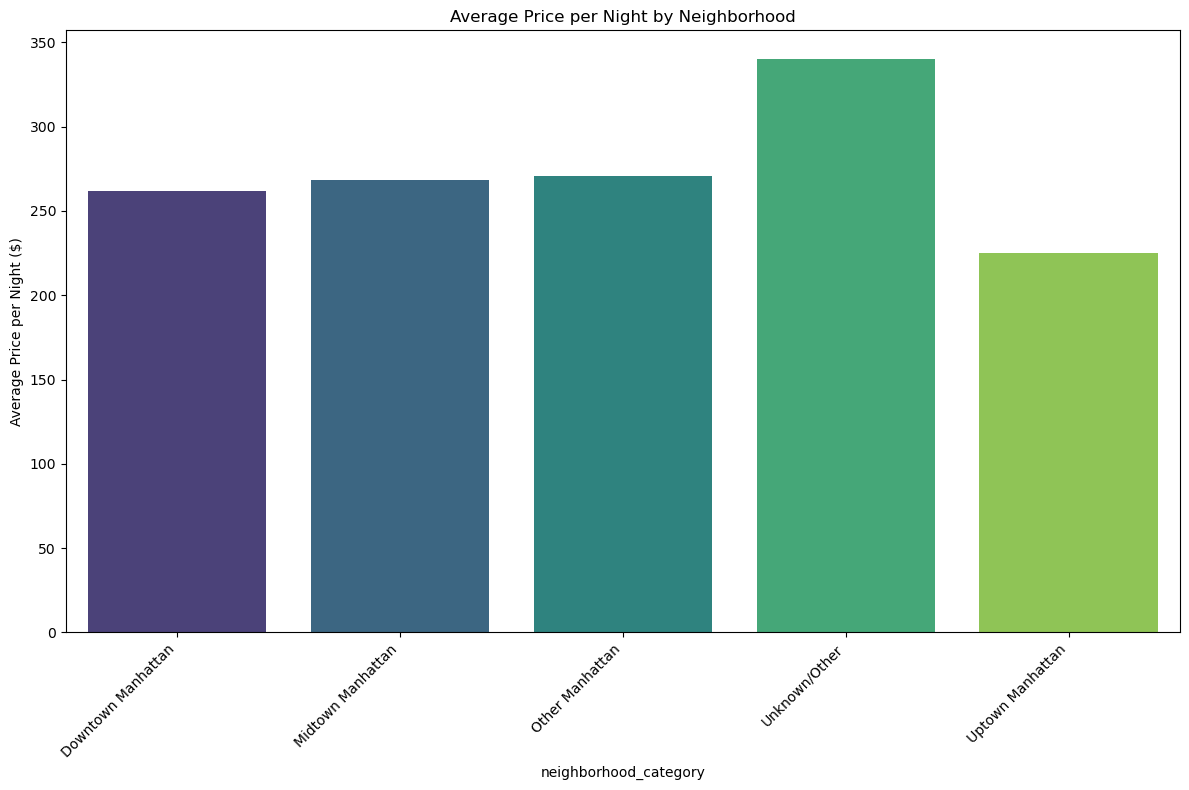

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the cleaned dataset
df = pd.read_csv('./0507_cleaned_booking_hotels.csv')

# Check the price_per_night column
print("Sample data from the DataFrame:")
print(df[['neighborhood_category', 'price', 'los', 'price_per_night']].head(500))

# Ensure that the necessary columns exist and are in the correct format
df['price_per_night'] = df['price_per_night'].astype(float)
df['neighborhood_category'] = df['neighborhood_category'].astype(str)

# Calculate the average price per night for each neighborhood
avg_price_per_night = df.groupby('neighborhood_category')['price_per_night'].mean().reset_index()

# Check the average price per night
print("Average price per night for each neighborhood:")
print(avg_price_per_night)

# Plotting the average price per night for each neighborhood
plt.figure(figsize=(12, 8))
sns.barplot(x='neighborhood_category', y='price_per_night', data=avg_price_per_night, palette='viridis')
plt.xticks(rotation=45, ha='right')
plt.title('Average Price per Night by Neighborhood')
plt.xlabel('neighborhood_category')
plt.ylabel('Average Price per Night ($)')
plt.tight_layout()
plt.show()


##  Data visualization - distributions

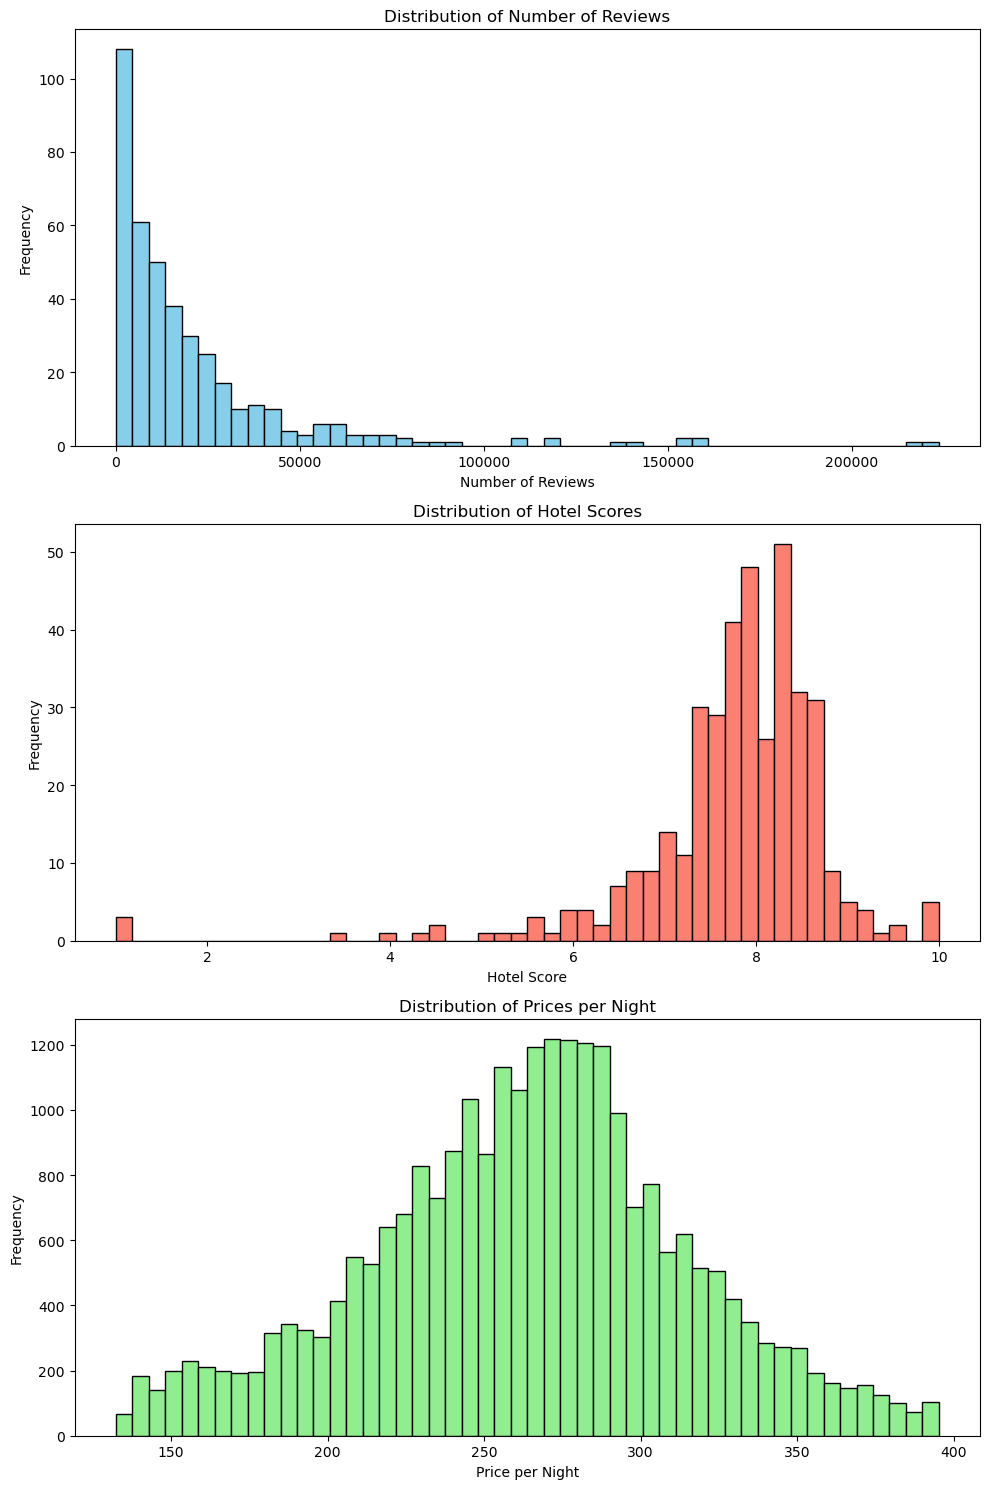

C:\Users\ronro\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ronro\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ronro\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


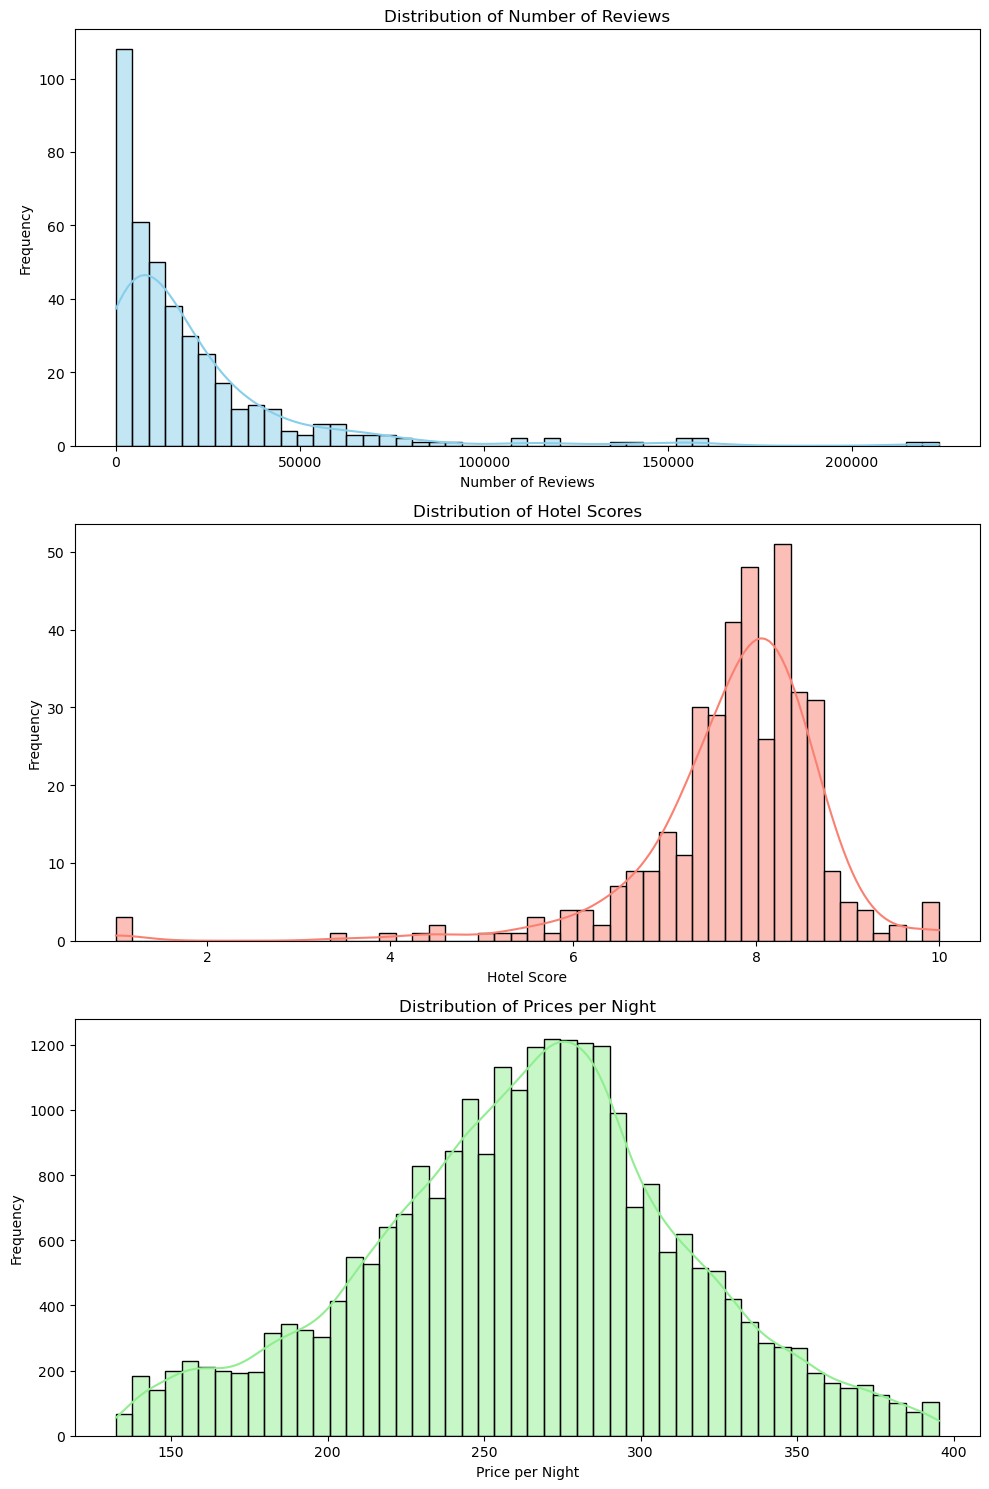

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the CSV file
df = pd.read_csv('./0507_cleaned_booking_hotels.csv')

# Ensure the reviews column is treated as a string and clean it
df['reviews'] = df['reviews'].astype(str).str.replace(r'\D', '', regex=True)
df['reviews'] = df['reviews'].replace('', '0').astype(int)  # Replace empty strings with '0' and convert to int

# Clean the necessary columns
df['score'] = df['score'].astype(str).str.extract('(\d+\.?\d*)').astype(float)
df['price'] = df['price'].astype(str).str.extract('(\d+\.?\d*)').astype(float)
df['price_per_night'] = df['price_per_night'].astype(str).str.extract('(\d+\.?\d*)').astype(float)

# Create a DataFrame where each hotel appears only once
df_unique_hotels = df.drop_duplicates(subset='name')

# Plot distributions using Matplotlib for unique hotels
fig, axs = plt.subplots(3, 1, figsize=(10, 15))

# Number of reviews distribution
axs[0].hist(df_unique_hotels['reviews'], bins=50, color='skyblue', edgecolor='black')
axs[0].set_title('Distribution of Number of Reviews')
axs[0].set_xlabel('Number of Reviews')
axs[0].set_ylabel('Frequency')

# Hotel score distribution
axs[1].hist(df_unique_hotels['score'], bins=50, color='salmon', edgecolor='black')
axs[1].set_title('Distribution of Hotel Scores')
axs[1].set_xlabel('Hotel Score')
axs[1].set_ylabel('Frequency')

# Price per night distribution
axs[2].hist(df['price_per_night'], bins=50, color='lightgreen', edgecolor='black')
axs[2].set_title('Distribution of Prices per Night')
axs[2].set_xlabel('Price per Night')
axs[2].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

# Plot distributions using Seaborn for unique hotels
fig, axs = plt.subplots(3, 1, figsize=(10, 15))

# Number of reviews distribution
sns.histplot(df_unique_hotels['reviews'], bins=50, kde=True, ax=axs[0], color='skyblue')
axs[0].set_title('Distribution of Number of Reviews')
axs[0].set_xlabel('Number of Reviews')
axs[0].set_ylabel('Frequency')

# Hotel score distribution
sns.histplot(df_unique_hotels['score'], bins=50, kde=True, ax=axs[1], color='salmon')
axs[1].set_title('Distribution of Hotel Scores')
axs[1].set_xlabel('Hotel Score')
axs[1].set_ylabel('Frequency')

# Price per night distribution
sns.histplot(df['price_per_night'], bins=50, kde=True, ax=axs[2], color='lightgreen')
axs[2].set_title('Distribution of Prices per Night')
axs[2].set_xlabel('Price per Night')
axs[2].set_ylabel('Frequency')

plt.tight_layout()
plt.show()


Data Types in Numeric DataFrame:
score                float64
reviews              float64
los                    int64
star_rating          float64
Free_cancellation      int64
TTT                    int64
Breakfast              int64
km_from_center       float64
price_per_night      float64
room_rate              int64
dtype: object

First Few Rows of Numeric DataFrame:
   score  reviews  los  star_rating  Free_cancellation  TTT  Breakfast  \
0    5.6   2473.0    1          1.0                  0    1          0   
1    6.6  13729.0    1          3.0                  0    1          0   
3    6.3    689.0    1          3.0                  0    1          0   
4    6.7    642.0    1          3.0                  0    1          0   
5    7.5    703.0    1          2.0                  0    1          1   

   km_from_center  price_per_night  room_rate  
0            5.70            140.0          1  
1            0.35            182.0          0  
3            5.00            215.0  

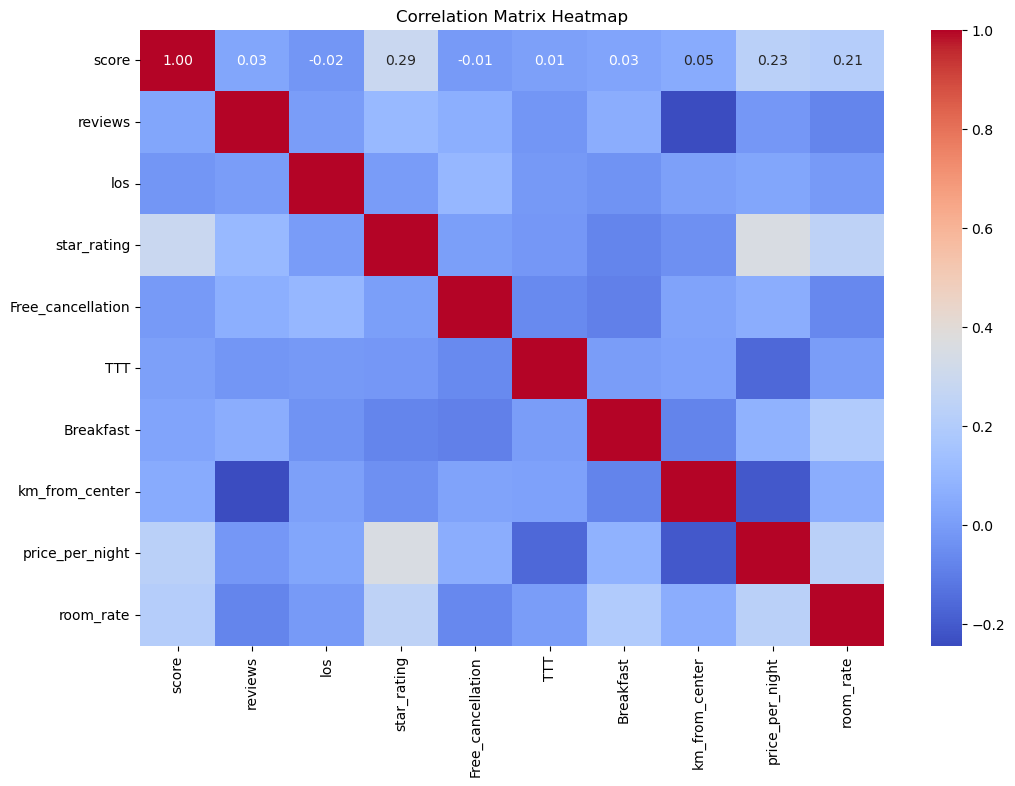

Price per Night Correlations:
price_per_night      1.000000
star_rating          0.356042
score                0.228864
room_rate            0.228547
Breakfast            0.077546
Free_cancellation    0.060667
los                  0.031991
reviews             -0.020348
TTT                 -0.163750
km_from_center      -0.205825
Name: price_per_night, dtype: float64


<Figure size 800x600 with 0 Axes>

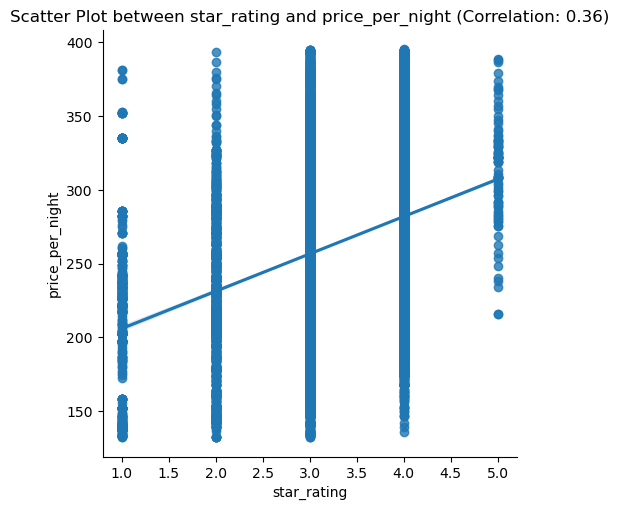

<Figure size 800x600 with 0 Axes>

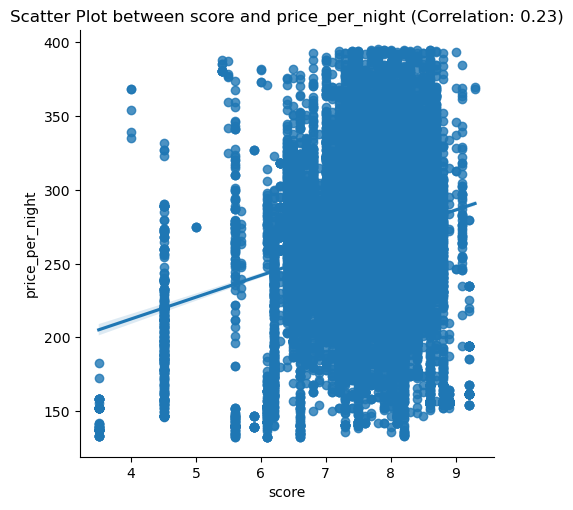

<Figure size 800x600 with 0 Axes>

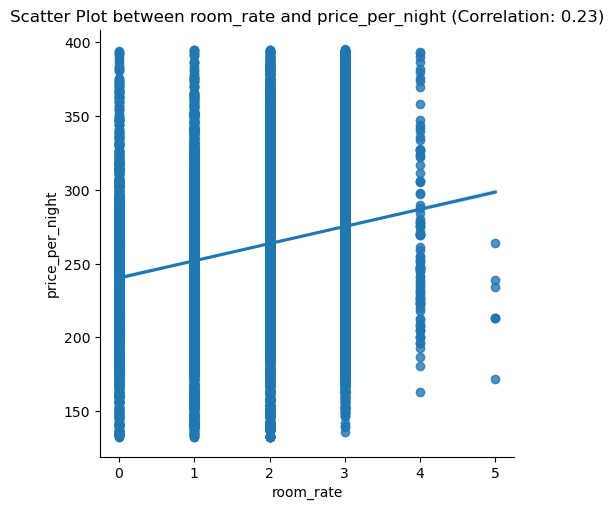

<Figure size 800x600 with 0 Axes>

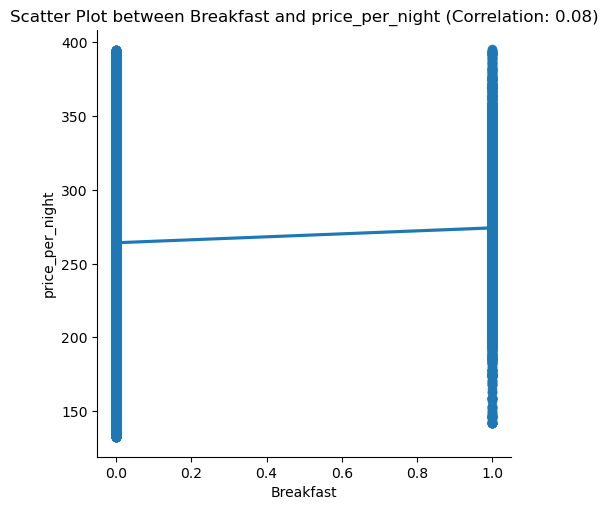

<Figure size 800x600 with 0 Axes>

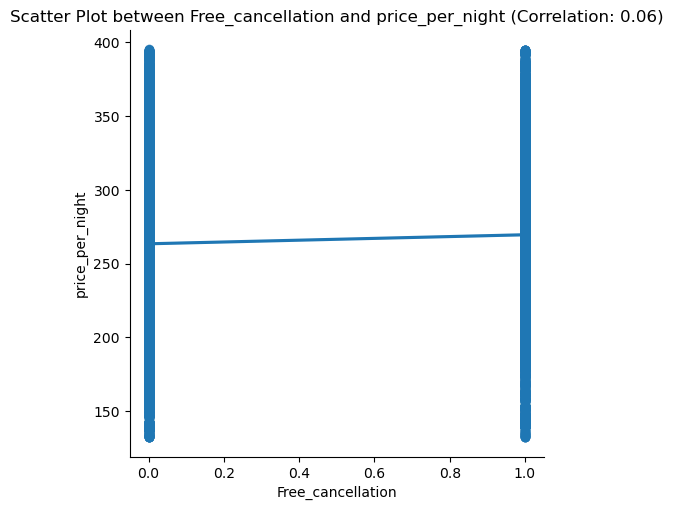

<Figure size 800x600 with 0 Axes>

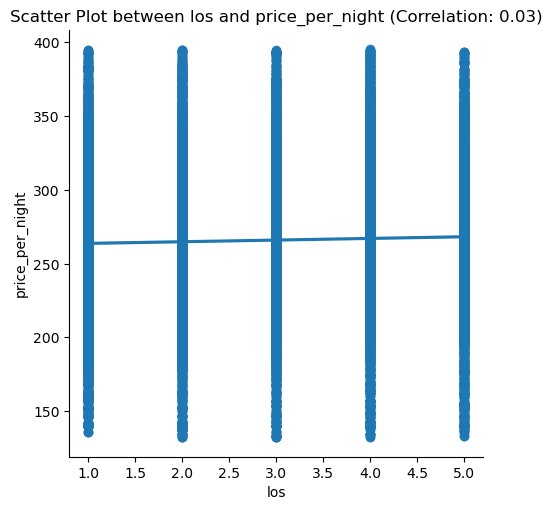

<Figure size 800x600 with 0 Axes>

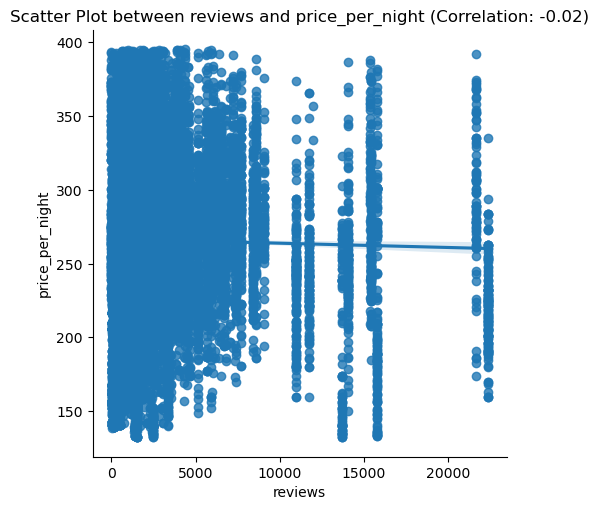

<Figure size 800x600 with 0 Axes>

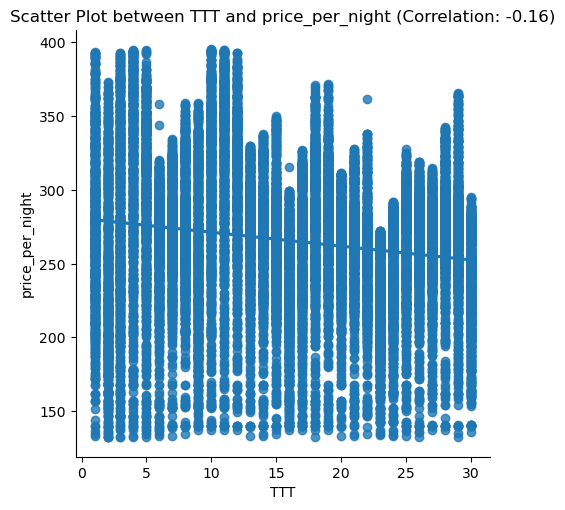

<Figure size 800x600 with 0 Axes>

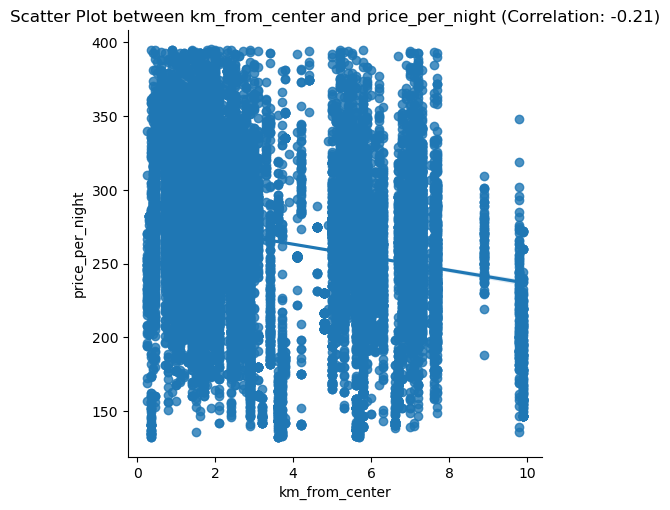

In [14]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the CSV file
df = pd.read_csv('./0507_cleaned_booking_hotels.csv')


# Drop 'location_rating' and 'price' columns if they exist
df_temp = df.drop(columns=['location_rating', 'price','location','Limited_rooms','index'], errors='ignore')

# Select only numeric columns
numeric_df = df_temp.select_dtypes(include=[float, int])

# Remove rows with null values in numeric columns
numeric_df = numeric_df.dropna()

# Verify the data types and the content of the dataframe
print("Data Types in Numeric DataFrame:")
print(numeric_df.dtypes)
print("\nFirst Few Rows of Numeric DataFrame:")
print(numeric_df.head())

# Check if we have any numeric columns left after dropping NA values
if numeric_df.empty:
    print("No numeric data available after preprocessing.")
else:
    # Calculate the correlation matrix
    correlation_matrix = numeric_df.corr()

    # Display the correlation matrix
    print("Correlation Matrix:")
    print(correlation_matrix)

    # Visualize the correlation matrix using a heatmap
    plt.figure(figsize=(12, 8))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
    plt.title('Correlation Matrix Heatmap')
    plt.show()

    # Visualize the strong relationships
    # Identify strong correlations (e.g., correlation coefficient > 0.5 or < -0.5)
    strong_correlations = correlation_matrix[(correlation_matrix > 0.5) | (correlation_matrix < -0.5)].stack().reset_index()
    strong_correlations = strong_correlations[strong_correlations['level_0'] != strong_correlations['level_1']]
    strong_correlations.columns = ['Feature 1', 'Feature 2', 'Correlation']

    # Plot the relationships for strong correlations
    for _, row in strong_correlations.iterrows():
        feature1 = row['Feature 1']
        feature2 = row['Feature 2']
        correlation = row['Correlation']
        
        plt.figure(figsize=(8, 6))
        sns.scatterplot(data=numeric_df, x=feature1, y=feature2)
        plt.title(f'Scatter Plot between {feature1} and {feature2} (Correlation: {correlation:.2f})')
        plt.xlabel(feature1)
        plt.ylabel(feature2)
        plt.show()

    # Specifically visualize the relationship between 'price_per_night' and other parameters
    if 'price_per_night' in numeric_df.columns:
        price_correlations = correlation_matrix['price_per_night'].sort_values(ascending=False)
        print("Price per Night Correlations:")
        print(price_correlations)

        # Plot the relationships for 'price_per_night'
        for feature in price_correlations.index:
            if feature != 'price_per_night':
                plt.figure(figsize=(8, 6))
                sns.lmplot(data=numeric_df, x=feature, y='price_per_night')
                plt.title(f'Scatter Plot between {feature} and price_per_night (Correlation: {price_correlations[feature]:.2f})')
                plt.xlabel(feature)
                plt.ylabel('price_per_night')
                plt.show()
    else:
        print("Column 'price_per_night' not found in the numerical columns.")


Data Types in Numeric DataFrame:
score                float64
reviews              float64
los                    int64
star_rating          float64
Free_cancellation      int64
TTT                    int64
Breakfast              int64
km_from_center       float64
price_per_night      float64
room_rate              int64
dtype: object

First Few Rows of Numeric DataFrame:
   score  reviews  los  star_rating  Free_cancellation  TTT  Breakfast  \
0    5.6   2473.0    1          1.0                  0    1          0   
1    6.6  13729.0    1          3.0                  0    1          0   
3    6.3    689.0    1          3.0                  0    1          0   
4    6.7    642.0    1          3.0                  0    1          0   
5    7.5    703.0    1          2.0                  0    1          1   

   km_from_center  price_per_night  room_rate  
0            5.70            140.0          1  
1            0.35            182.0          0  
3            5.00            215.0  

C:\Users\ronro\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ronro\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ronro\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ronro\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

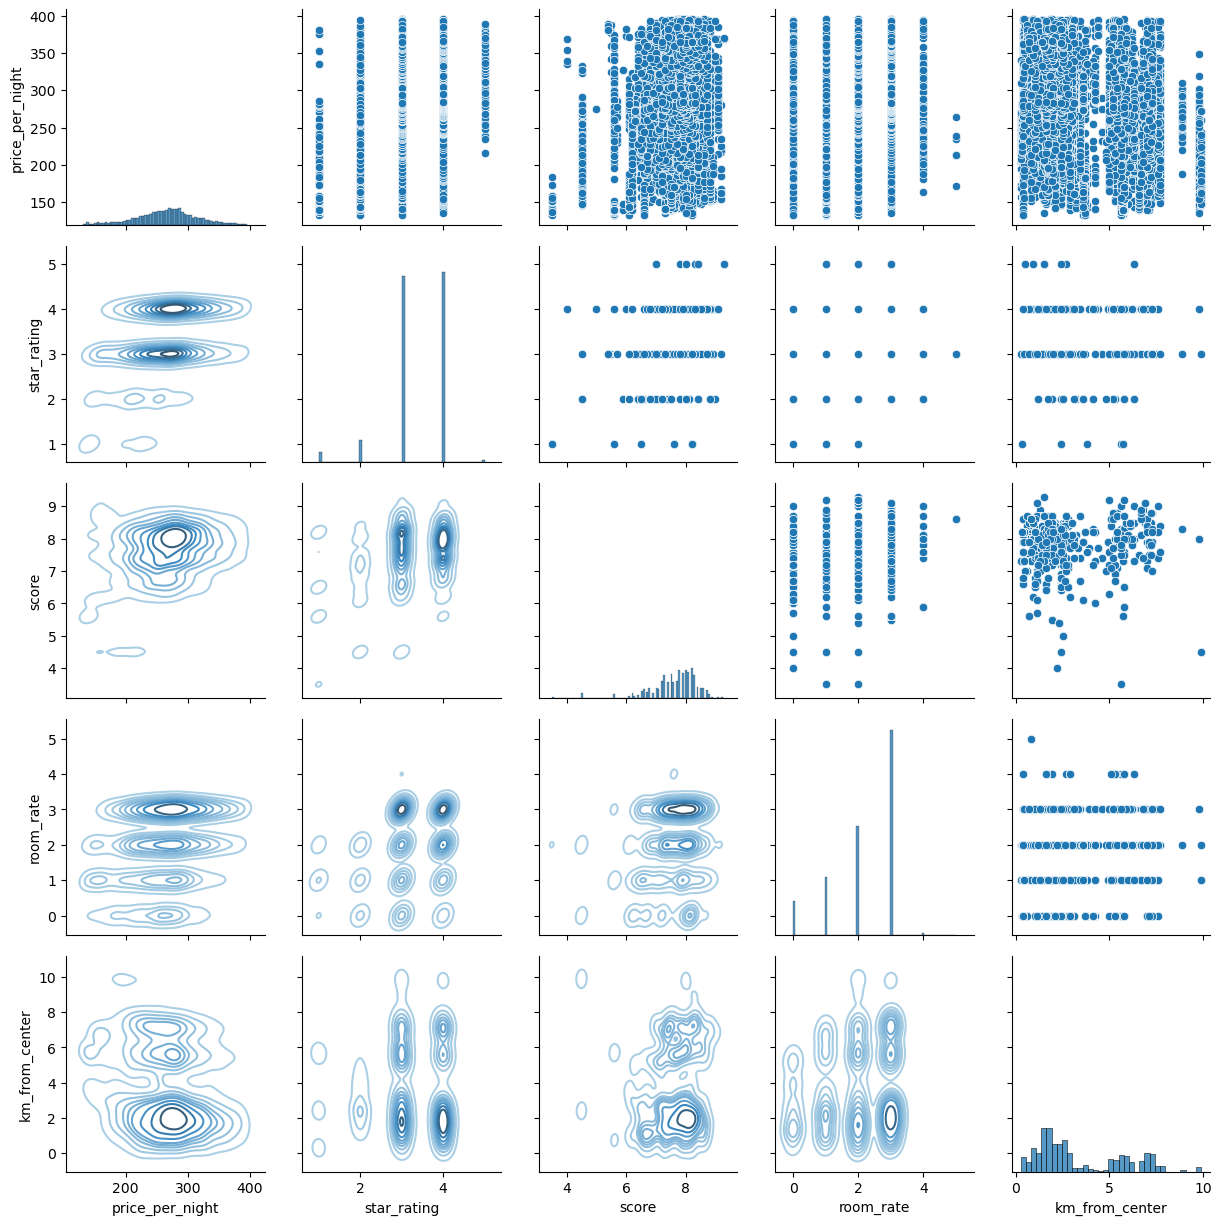

In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the CSV file
df = pd.read_csv('./0507_cleaned_booking_hotels.csv')

# Drop 'location_rating' and 'price' columns if they exist
df_temp = df.drop(columns=['location_rating', 'price','location','Limited_rooms','index'], errors='ignore')


# Select only numeric columns
numeric_df = df_temp.select_dtypes(include=[float, int])

# Remove rows with null values in numeric columns
numeric_df = numeric_df.dropna()

# Verify the data types and the content of the dataframe
print("Data Types in Numeric DataFrame:")
print(numeric_df.dtypes)
print("\nFirst Few Rows of Numeric DataFrame:")
print(numeric_df.head())

# Check if we have any numeric columns left after dropping NA values
if numeric_df.empty:
    print("No numeric data available after preprocessing.")
else:
    # Calculate the correlation matrix
    correlation_matrix = numeric_df.corr()

    # Display the correlation matrix
    print("Correlation Matrix:")
    print(correlation_matrix)

    # Create a PairGrid to visualize pairwise relationships
    selected_features = ['price_per_night', 'star_rating', 'score', 'room_rate', 'km_from_center']
    g = sns.PairGrid(numeric_df, vars=selected_features)
    g.map_upper(sns.scatterplot)
    g.map_lower(sns.kdeplot, cmap='Blues_d')
    g.map_diag(sns.histplot, kde_kws={'color': 'k'})
    plt.show()

,star_rating,price_per_night
0,1.0,201.831146
1,2.0,226.902738
2,3.0,258.254504
3,4.0,280.461506
4,5.0,312.945185


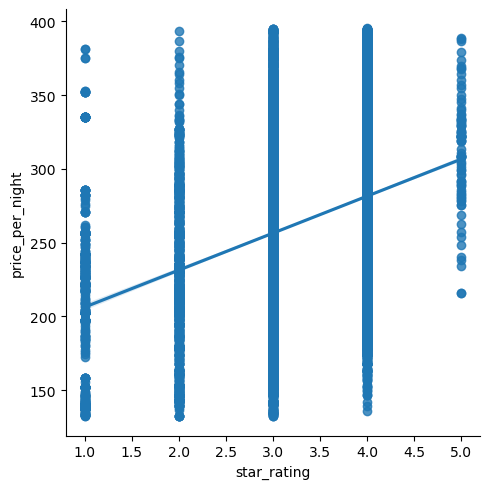

In [17]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.read_csv('./0507_cleaned_booking_hotels.csv')

sns.lmplot(x='star_rating',y='price_per_night',data=df)


# Remove hotels that do not have a star rating
data_filtered = df.dropna(subset=['star_rating'])

# Group by star_rating and calculate the average price per night
average_prices = data_filtered.groupby('star_rating')['price_per_night'].mean().reset_index()

# Display the results
average_prices

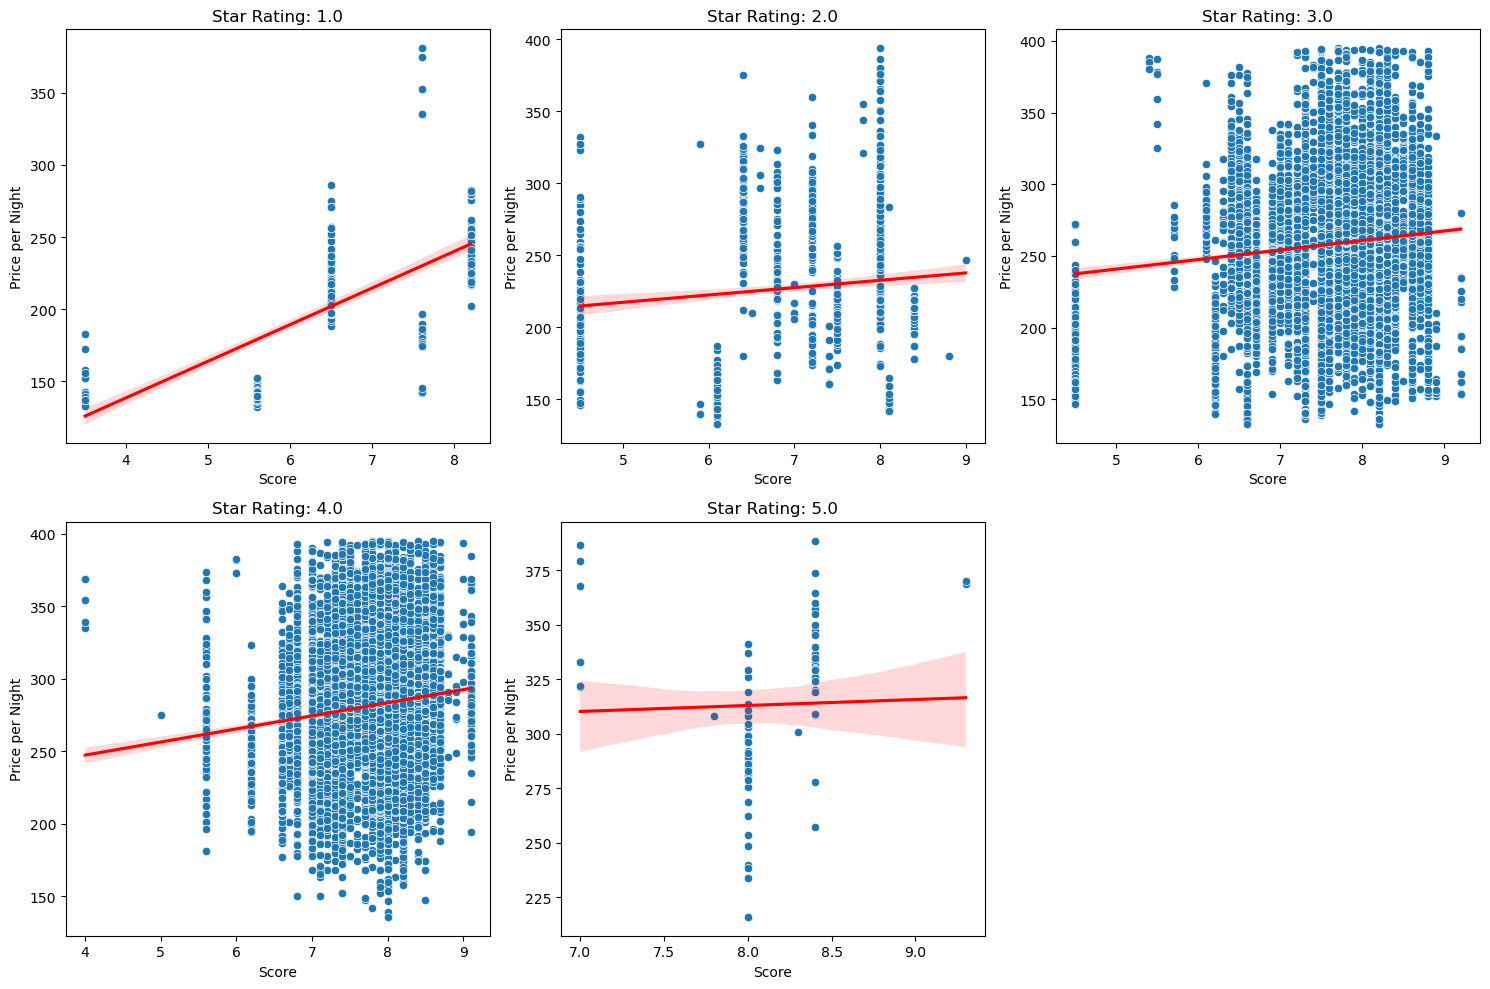

In [18]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the data
data =pd.read_csv('./0507_cleaned_booking_hotels.csv')

# Filter out hotels without a star rating
data_filtered = data.dropna(subset=['star_rating'])

# Get unique star ratings
unique_star_ratings = sorted(data_filtered['star_rating'].unique())

# Create subplots with regression lines
plt.figure(figsize=(15, 10))

for i, star in enumerate(unique_star_ratings, 1):
    plt.subplot(2, 3, i)
    star_data = data_filtered[data_filtered['star_rating'] == star]
    sns.scatterplot(x='score', y='price_per_night', data=star_data)
    sns.regplot(x='score', y='price_per_night', data=star_data, scatter=False, color='red')
    plt.title(f'Star Rating: {star}')
    plt.xlabel('Score')
    plt.ylabel('Price per Night')

plt.tight_layout()
plt.show()


### Overall, the trend indicates that higher scores generally correspond to higher prices, especially in the 1-star and 2-star categories. However, the correlation is weaker in the higher star ratings, suggesting more complexity in pricing mechanisms for higher-rated hotels.

C:\Users\ronro\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ronro\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ronro\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ronro\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

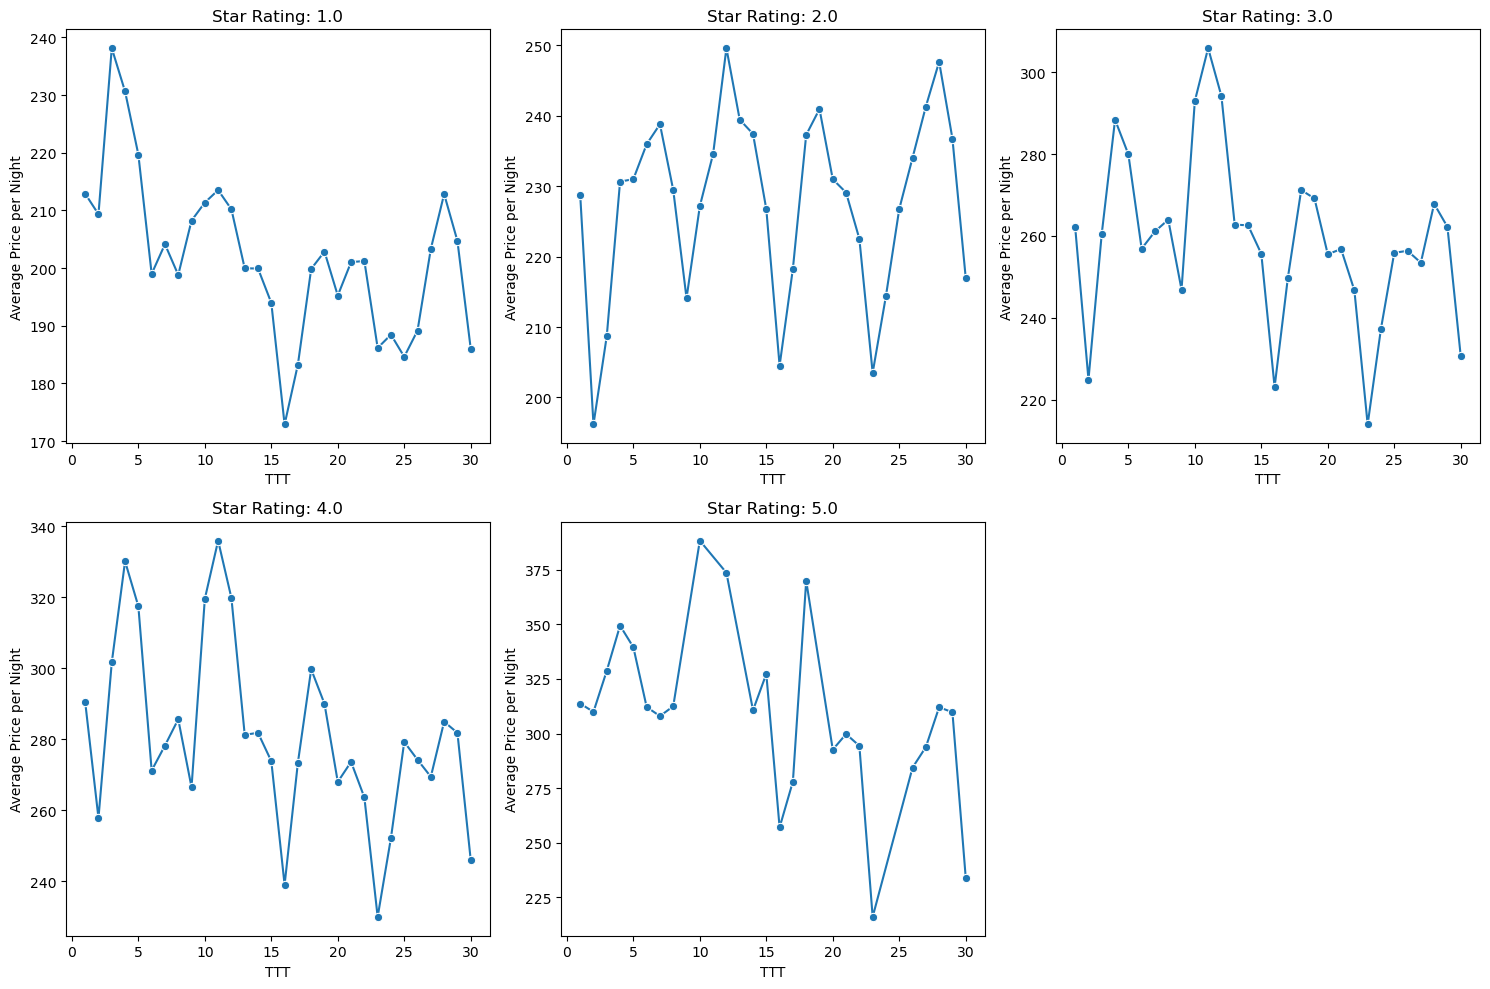

In [19]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

data = pd.read_csv('./0507_cleaned_booking_hotels.csv')

data_filtered = data.dropna(subset=['star_rating'])

# Group by star_rating and TTT, then calculate the average price per night
average_prices_ttt = data_filtered.groupby(['star_rating', 'TTT'])['price_per_night'].mean().reset_index()

# Plot the relationship
plt.figure(figsize=(15, 10))

unique_star_ratings = sorted(data_filtered['star_rating'].dropna().unique())

for i, star in enumerate(unique_star_ratings, 1):
    plt.subplot(2, 3, i)
    star_data = average_prices_ttt[average_prices_ttt['star_rating'] == star]
    sns.lineplot(x='TTT', y='price_per_night', data=star_data, marker='o')
    plt.title(f'Star Rating: {star}')
    plt.xlabel('TTT')
    plt.ylabel('Average Price per Night')

plt.tight_layout()
plt.show()


Dataset 1 - Average Prices by Star Rating and TTT
   star_rating  TTT  price_per_night
0          1.0    1       226.400000
1          1.0    2       236.903846
2          1.0    3       201.845139
3          1.0    4       205.459722
4          1.0    5       217.476667

Dataset 2 - Average Prices by Star Rating and TTT
   star_rating  TTT  price_per_night
0          1.0    1       192.522500
1          1.0    2       196.313333
2          1.0    3       206.993333
3          1.0    4       197.715909
4          1.0    5       174.664394

Dataset 3 - Average Prices by Star Rating and TTT
   star_rating  TTT  price_per_night
0          1.0    1       212.900000
1          1.0    2       209.341176
2          1.0    3       238.138542
3          1.0    4       230.633333
4          1.0    5       219.684314


C:\Users\ronro\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ronro\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ronro\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ronro\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

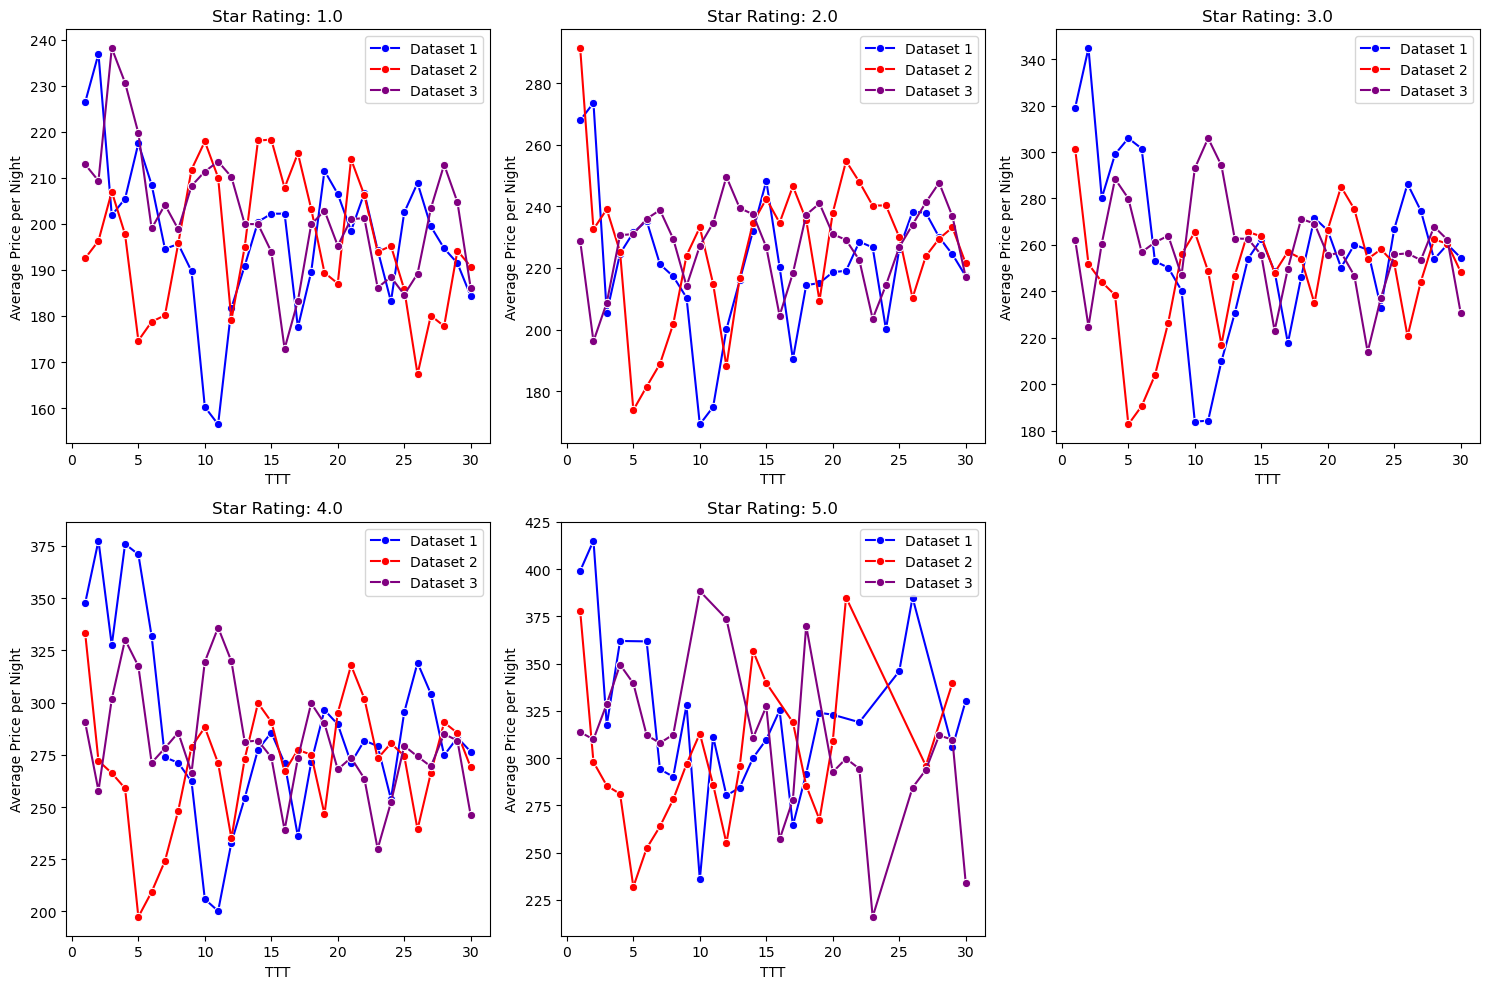

In [22]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the first data file
data1 = pd.read_csv('./20_06_hotels_data_cleaned.csv')      

# Load the second data file
data2 = pd.read_csv('./2506_cleaned_booking_hotels.csv')
data3 = pd.read_csv('./0507_cleaned_booking_hotels.csv')

# Remove hotels that do not have a star rating
data1_filtered = data1.dropna(subset=['star_rating'])
data2_filtered = data2.dropna(subset=['star_rating'])
data3_filtered = data3.dropna(subset=['star_rating'])

# Group by star_rating and TTT, then calculate the average price per night
average_prices_ttt1 = data1_filtered.groupby(['star_rating', 'TTT'])['price_per_night'].mean().reset_index()
average_prices_ttt2 = data2_filtered.groupby(['star_rating', 'TTT'])['price_per_night'].mean().reset_index()
average_prices_ttt3 = data3_filtered.groupby(['star_rating', 'TTT'])['price_per_night'].mean().reset_index()

# Debug prints to check data
print("Dataset 1 - Average Prices by Star Rating and TTT")
print(average_prices_ttt1.head())
print("\nDataset 2 - Average Prices by Star Rating and TTT")
print(average_prices_ttt2.head())
print("\nDataset 3 - Average Prices by Star Rating and TTT")
print(average_prices_ttt3.head())

# Plot the relationship
plt.figure(figsize=(15, 10))

unique_star_ratings = sorted(data1_filtered['star_rating'].dropna().unique())

for i, star in enumerate(unique_star_ratings, 1):
    plt.subplot(2, 3, i)
    
    star_data1 = average_prices_ttt1[average_prices_ttt1['star_rating'] == star]
    star_data2 = average_prices_ttt2[average_prices_ttt2['star_rating'] == star]
    star_data3 = average_prices_ttt3[average_prices_ttt3['star_rating'] == star]

    if not star_data1.empty:
        sns.lineplot(x='TTT', y='price_per_night', data=star_data1, marker='o', label='Dataset 1', color='blue')
    if not star_data2.empty:
        sns.lineplot(x='TTT', y='price_per_night', data=star_data2, marker='o', label='Dataset 2', color='red')
    if not star_data3.empty:
        sns.lineplot(x='TTT', y='price_per_night', data=star_data3, marker='o', label='Dataset 3', color='purple')
    
    plt.title(f'Star Rating: {star}')
    plt.xlabel('TTT')
    plt.ylabel('Average Price per Night')
    plt.legend()

plt.tight_layout()
plt.show()


C:\Users\ronro\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


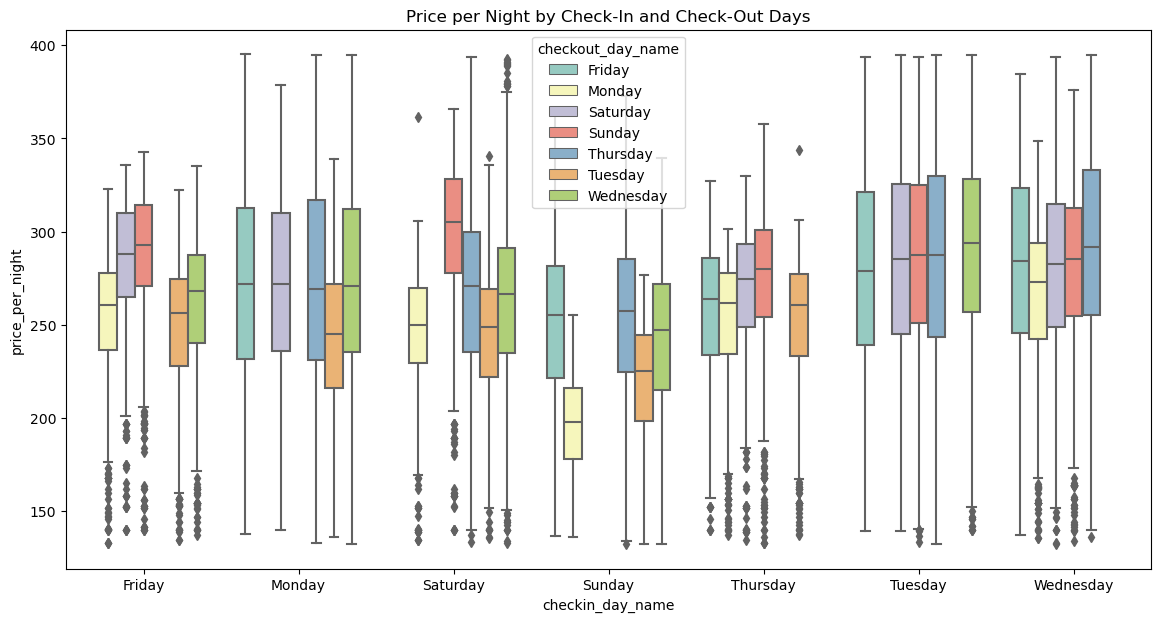

C:\Users\ronro\anaconda3\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


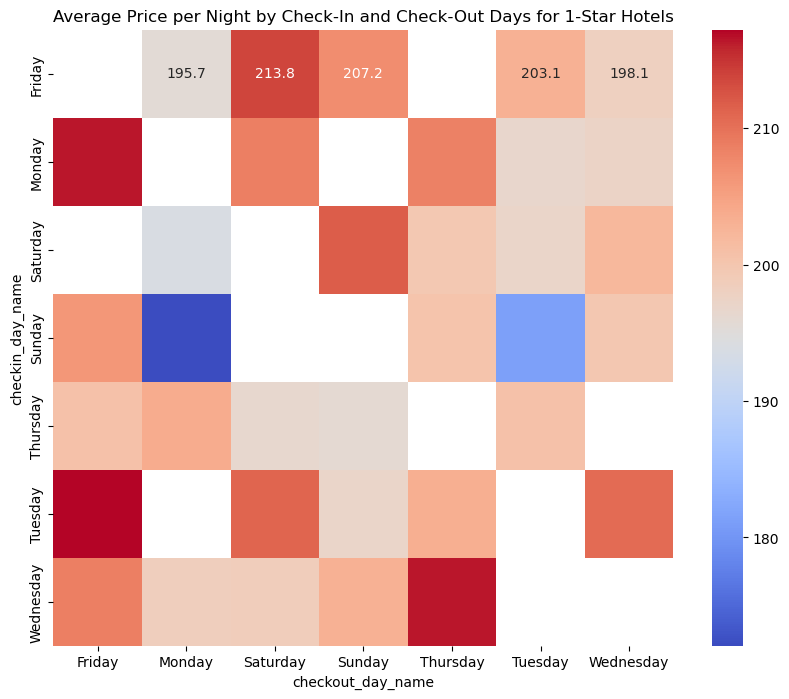

C:\Users\ronro\anaconda3\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


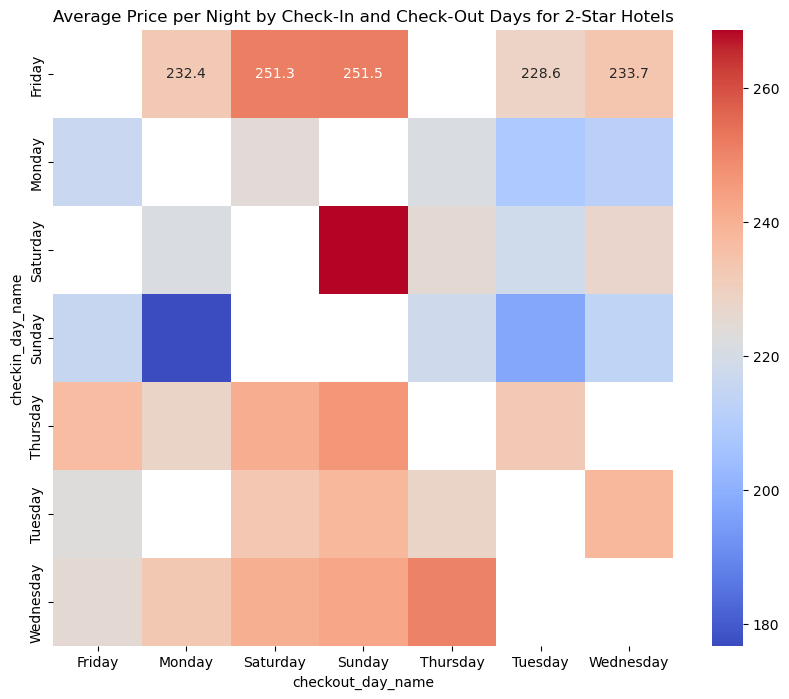

C:\Users\ronro\anaconda3\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


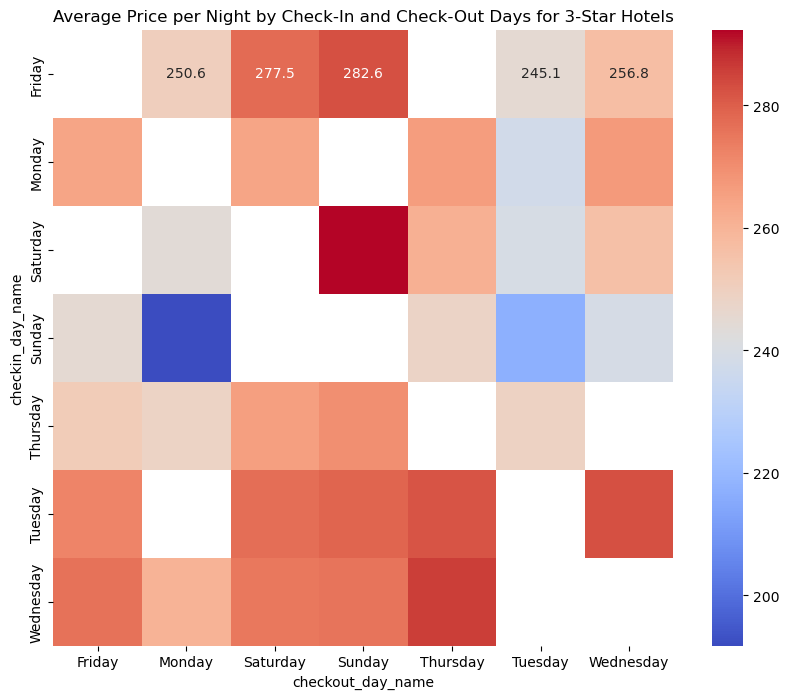

C:\Users\ronro\anaconda3\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


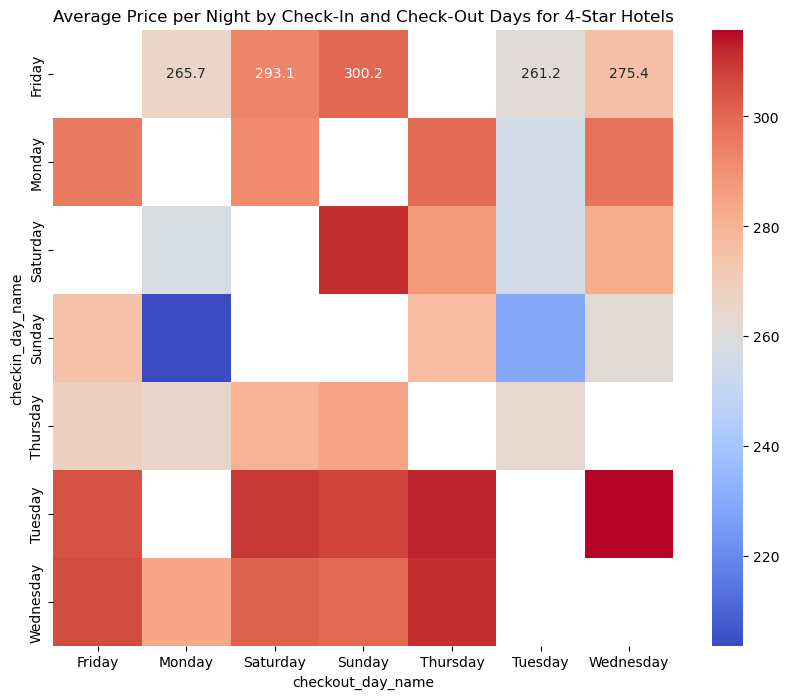

C:\Users\ronro\anaconda3\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


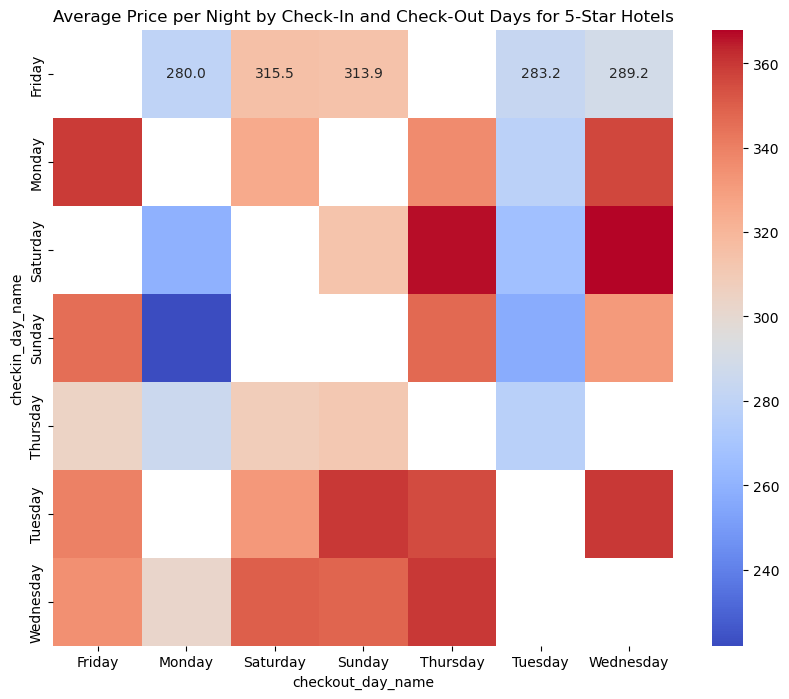

In [23]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the CSV file
df = pd.read_csv('./0507_cleaned_booking_hotels.csv')


# Ensure 'Snapshot' is in datetime format
df['Snapshot'] = pd.to_datetime(df['Snapshot'], errors='coerce')

# Ensure 'TTT' and 'LOS' are numeric
df['TTT'] = pd.to_numeric(df['TTT'], errors='coerce')
df['los'] = pd.to_numeric(df['los'], errors='coerce')

# Calculate check-in date by adding 'TTT' to 'Snapshot'
df['checkin'] = df['Snapshot'] + pd.to_timedelta(df['TTT'], unit='d')

# Calculate check-out date by adding 'LOS' to 'checkin'
df['checkout'] = df['checkin'] + pd.to_timedelta(df['los'], unit='d')

# Add columns for the day name of check-in and check-out
df['checkin_day_name'] = df['checkin'].dt.day_name()
df['checkout_day_name'] = df['checkout'].dt.day_name()

# Convert day names to categorical variables
df['checkin_day_name'] = df['checkin_day_name'].astype('category')
df['checkout_day_name'] = df['checkout_day_name'].astype('category')

# Identify and handle outliers in 'price_per_night'
df['price_per_night'] = pd.to_numeric(df['price_per_night'], errors='coerce')

# Remove rows where 'price_per_night' is less than a reasonable minimum price (e.g., $10)
df = df[df['price_per_night'] > 10]

# Visualize the relationship between check-in and check-out days with price per night
plt.figure(figsize=(14, 7))
sns.boxplot(x='checkin_day_name', y='price_per_night', hue='checkout_day_name', data=df, palette='Set3')
plt.title('Price per Night by Check-In and Check-Out Days')
plt.show()

# Prepare data for heatmaps based on star ratings
star_ratings = [1, 2, 3, 4, 5]
heatmap_data = {}
for star in star_ratings:
    heatmap_data[star] = df[df['star_rating'] == star].pivot_table(index='checkin_day_name', columns='checkout_day_name', values='price_per_night', aggfunc='mean')

# Create heatmaps for each star rating with annotations
for star in star_ratings:
    plt.figure(figsize=(10, 8))
    ax = sns.heatmap(heatmap_data[star], annot=True, fmt=".1f", cmap='coolwarm', cbar=True)
    plt.title(f'Average Price per Night by Check-In and Check-Out Days for {star}-Star Hotels')
    plt.show()

# Optionally, save the updated DataFrame to a new CSV file
df.to_csv('./0507_hotels_data_cleaned_with_days_name_parameters.csv', index=False)

In [28]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder

# Load the CSV file
df = pd.read_csv('./0507_hotels_data_cleaned_with_days_name_parameters.csv')

# Ensure 'Snapshot' is in datetime format
df['Snapshot'] = pd.to_datetime(df['Snapshot'], errors='coerce')

# Ensure 'TTT' and 'LOS' are numeric
df['TTT'] = pd.to_numeric(df['TTT'], errors='coerce')
df['los'] = pd.to_numeric(df['los'], errors='coerce')

# Calculate check-in date by adding 'TTT' to 'Snapshot'
df['checkin'] = df['Snapshot'] + pd.to_timedelta(df['TTT'], unit='d')

# Calculate check-out date by adding 'LOS' to 'checkin'
df['checkout'] = df['checkin'] + pd.to_timedelta(df['los'], unit='d')

# Add columns for the day of the month for check-in and check-out
df['checkin_day'] = df['checkin'].dt.day
df['checkout_day'] = df['checkout'].dt.day

# Function to determine the period of the month
def determine_period(start_day, end_day):
    avg_day = (start_day + end_day) / 2
    if avg_day < 10:
        return 'beginning of the month'
    elif 10 <= avg_day < 22:
        return 'middle of the month'
    else:
        return 'end of the month'

# Apply the function to create the 'period_of_the_month' column
df['period_of_the_month'] = df.apply(lambda row: determine_period(row['checkin_day'], row['checkout_day']), axis=1)

# Perform one-hot encoding for 'checkin_day_name', 'checkout_day_name', and 'period_of_the_month'
checkin_encoder = OneHotEncoder(sparse=False)
encoded_checkin = checkin_encoder.fit_transform(df[['checkin_day_name']])

checkout_encoder = OneHotEncoder(sparse=False)
encoded_checkout = checkout_encoder.fit_transform(df[['checkout_day_name']])

period_encoder = OneHotEncoder(sparse=False)
encoded_period = period_encoder.fit_transform(df[['period_of_the_month']])

# Create DataFrames for the encoded columns
encoded_checkin_df = pd.DataFrame(encoded_checkin, columns=checkin_encoder.get_feature_names_out(['checkin_day_name']))
encoded_checkout_df = pd.DataFrame(encoded_checkout, columns=checkout_encoder.get_feature_names_out(['checkout_day_name']))
encoded_period_df = pd.DataFrame(encoded_period, columns=period_encoder.get_feature_names_out(['period_of_the_month']))

# Drop the original columns and concatenate the new one-hot encoded columns
df = df.drop(columns=['checkin_day_name', 'checkout_day_name', 'period_of_the_month'])
df = df.join(encoded_checkin_df).join(encoded_checkout_df).join(encoded_period_df)

# Save the updated DataFrame to a new CSV file
output_file = './05_07_hotels_data_cleaned_with_days_name_parameters_period_encoded.csv'
df.to_csv(output_file, index=False)

# Display the first few rows of the updated DataFrame
print(df.head())


C:\Users\ronro\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
C:\Users\ronro\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
C:\Users\ronro\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


                   name  score  reviews                           room_type  \
0    U.S. Pacific Hotel    5.6   2473.0         Standard Double (No Window)   
1        West Side YMCA    6.6  13729.0  Bunk Bed Room with Shared Bathroom   
2       Hudson Yard 408    4.4     61.0                         Double Room   
3      The Gatsby Hotel    6.3    689.0                         Gatsby Full   
4  Orchard Street Hotel    6.7    642.0                        Orchard Full   

                                            bed_type  price  \
0   New YorkShow on map5.7 km from centreMetro ac...  140.0   
1   New YorkShow on map350 m from centreMetro access  182.0   
2   New YorkShow on map1.9 km from centreMetro ac...  189.0   
3    New YorkShow on map5 km from centreMetro access  215.0   
4   New YorkShow on map5.3 km from centreMetro ac...  215.0   

        availability  los                                                url  \
0  1 night, 2 adults    1  https://www.booking.com/hotel/us/us-pac

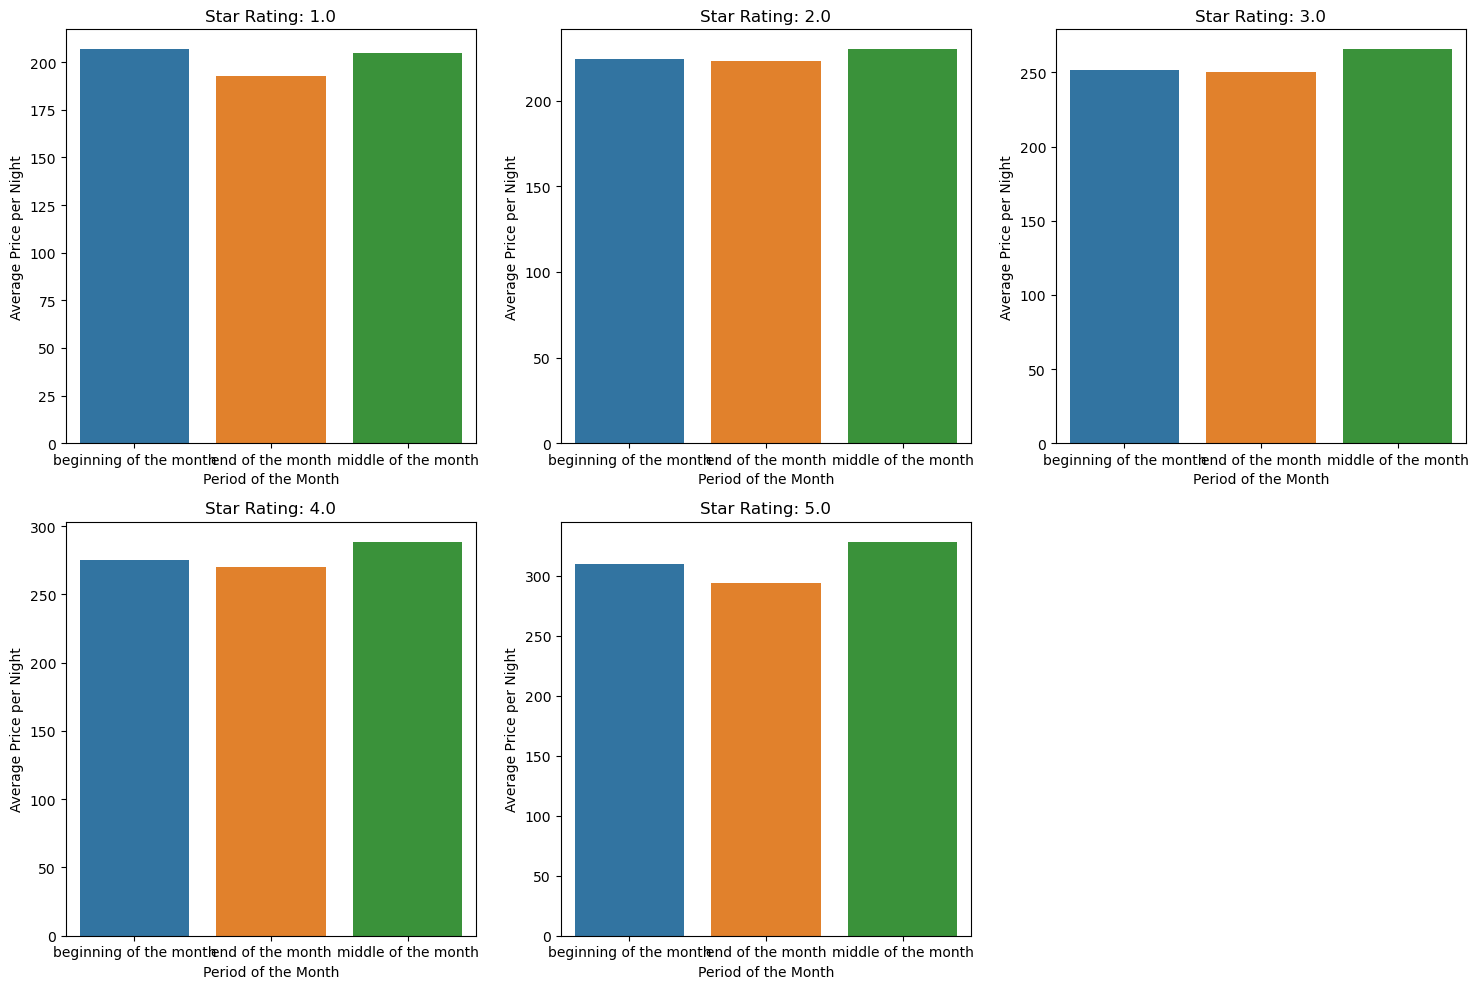

In [34]:

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Load the CSV file
df = pd.read_csv('./05_07_hotels_data_cleaned_with_days_name_parameters_period_encoded.csv')

def decode_period(row):
    if row['period_of_the_month_beginning of the month'] == 1.0:
        return 'beginning of the month'
    elif row['period_of_the_month_middle of the month'] == 1.0:
        return 'middle of the month'
    elif row['period_of_the_month_end of the month'] == 1.0:
        return 'end of the month'
    return 'unknown'

# Apply the function to create the 'period_of_the_month' column
df['period_of_the_month'] = df.apply(decode_period, axis=1)
average_price_per_period = df.groupby(['star_rating', 'period_of_the_month'])['price_per_night'].mean().reset_index()


# Get unique star ratings
unique_star_ratings = average_price_per_period['star_rating'].unique()

# Create subplots for each star rating
plt.figure(figsize=(15, 10))

for i, star in enumerate(unique_star_ratings, 1):
    plt.subplot(2, 3, i)
    star_data = average_price_per_period[average_price_per_period['star_rating'] == star]
    sns.barplot(data=star_data, x='period_of_the_month', y='price_per_night')
    plt.title(f'Star Rating: {star}')
    plt.xlabel('Period of the Month')
    plt.ylabel('Average Price per Night')

plt.tight_layout()
plt.show()
